### IMPORTACIONES

In [124]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score,  ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV



In [125]:
df = pd.read_csv("./data/diabetes.csv")

### EDA

In [88]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [89]:
df.sample(10, random_state=42)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
68,0,44,4.4,56,4.2,3.4,1.3,1.3,1.5,0.6,21.0,0
194,1,52,5.1,70,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
82,0,40,6.3,79,4.9,4.3,0.8,0.8,1.8,1.2,22.0,0
247,1,60,10.0,194,7.1,4.6,1.6,0.8,1.8,1.7,26.0,2
109,0,39,3.0,38,6.4,4.7,1.3,1.1,3.1,0.6,22.0,1
118,1,50,4.8,62,5.9,5.3,1.3,1.0,3.7,0.6,19.0,1
113,1,50,5.0,74,6.2,2.0,0.8,0.6,1.0,0.4,25.0,1
178,0,53,4.7,53,8.6,6.2,1.7,1.1,4.3,0.8,30.0,2
9,0,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21.0,0
251,1,53,7.5,230,11.6,9.1,1.5,1.4,2.1,7.0,27.0,2


In [90]:
#forma del dataframe
df.shape

(264, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [92]:
#resumen numerico del dataframe
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [93]:
df['Class'].value_counts(normalize=True)

Class
2    0.484848
0    0.363636
1    0.151515
Name: proportion, dtype: float64

In [38]:
#conteo de nulos por columna
df.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [94]:
#porcentaje ded nulos por columna
df.isna().mean() * 100

Gender    0.0
AGE       0.0
Urea      0.0
Cr        0.0
HbA1c     0.0
Chol      0.0
TG        0.0
HDL       0.0
LDL       0.0
VLDL      0.0
BMI       0.0
Class     0.0
dtype: float64

In [95]:
#valores unicos por columna
df.nunique()

Gender     2
AGE       42
Urea      83
Cr        90
HbA1c     74
Chol      57
TG        45
HDL       25
LDL       45
VLDL      33
BMI       38
Class      3
dtype: int64

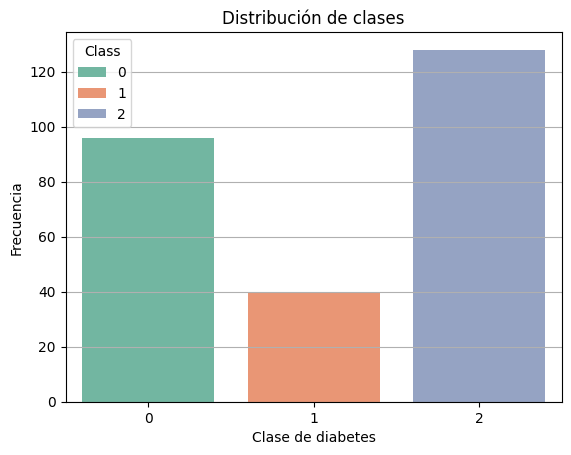

In [96]:
sns.countplot(data=df, x="Class", palette="Set2", hue="Class", legend='auto')
plt.title("Distribución de clases")
plt.xlabel("Clase de diabetes")
plt.ylabel("Frecuencia")
plt.grid(axis="y")
plt.show()


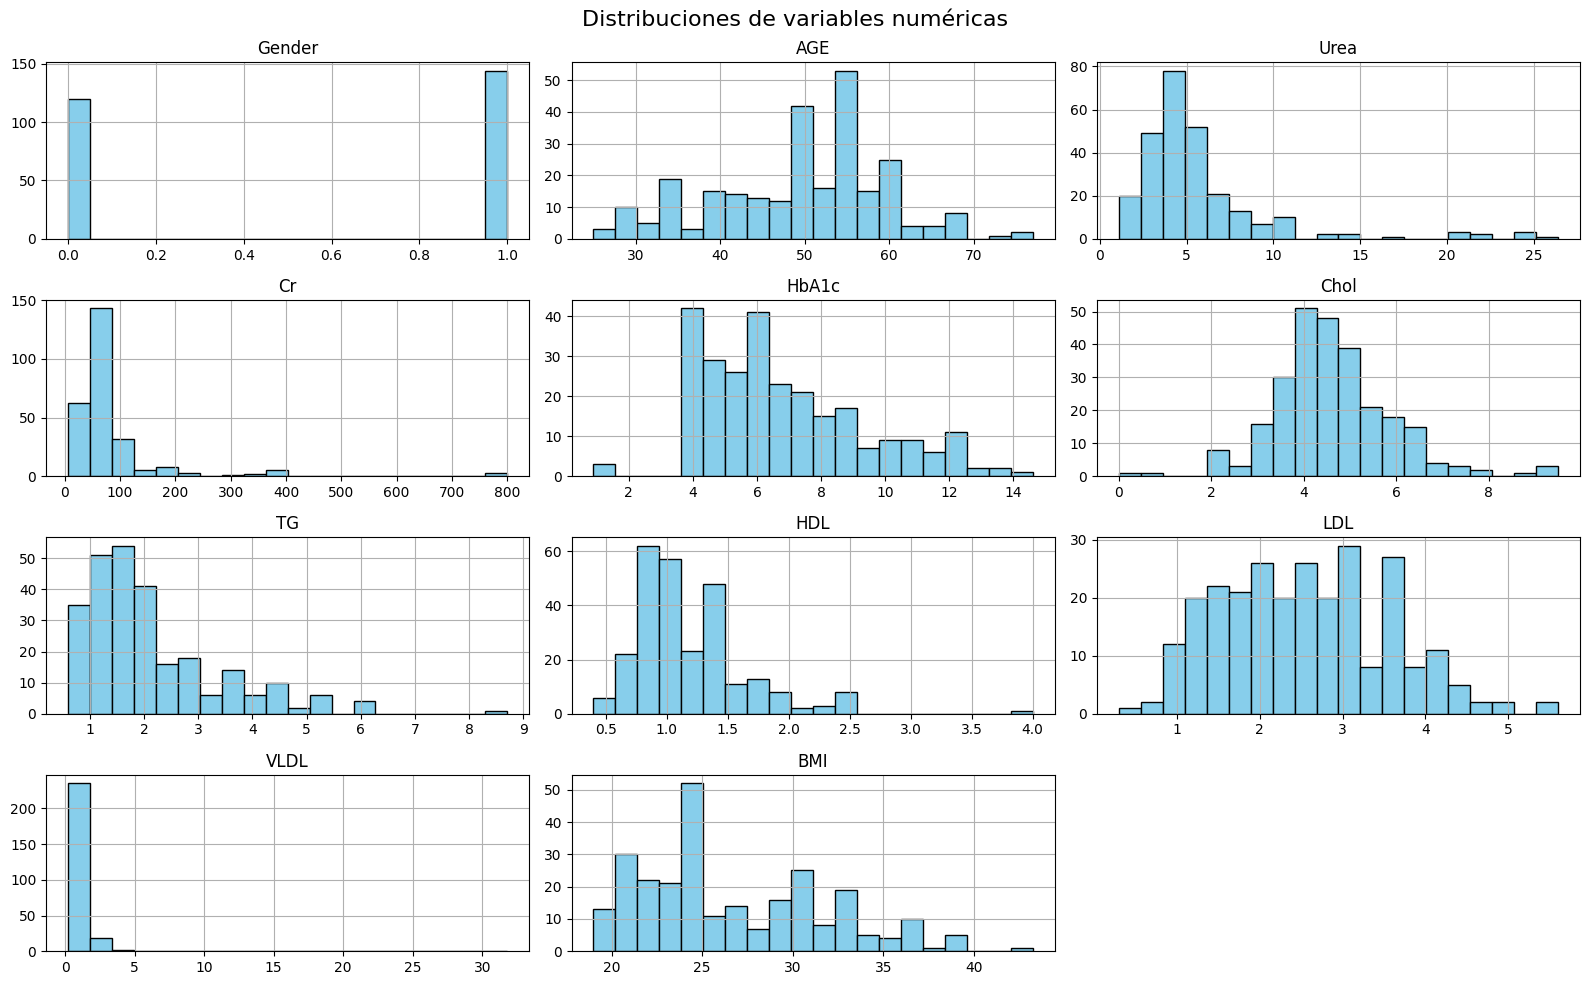

In [97]:
df.drop(columns="Class").hist(bins=20, figsize=(16, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


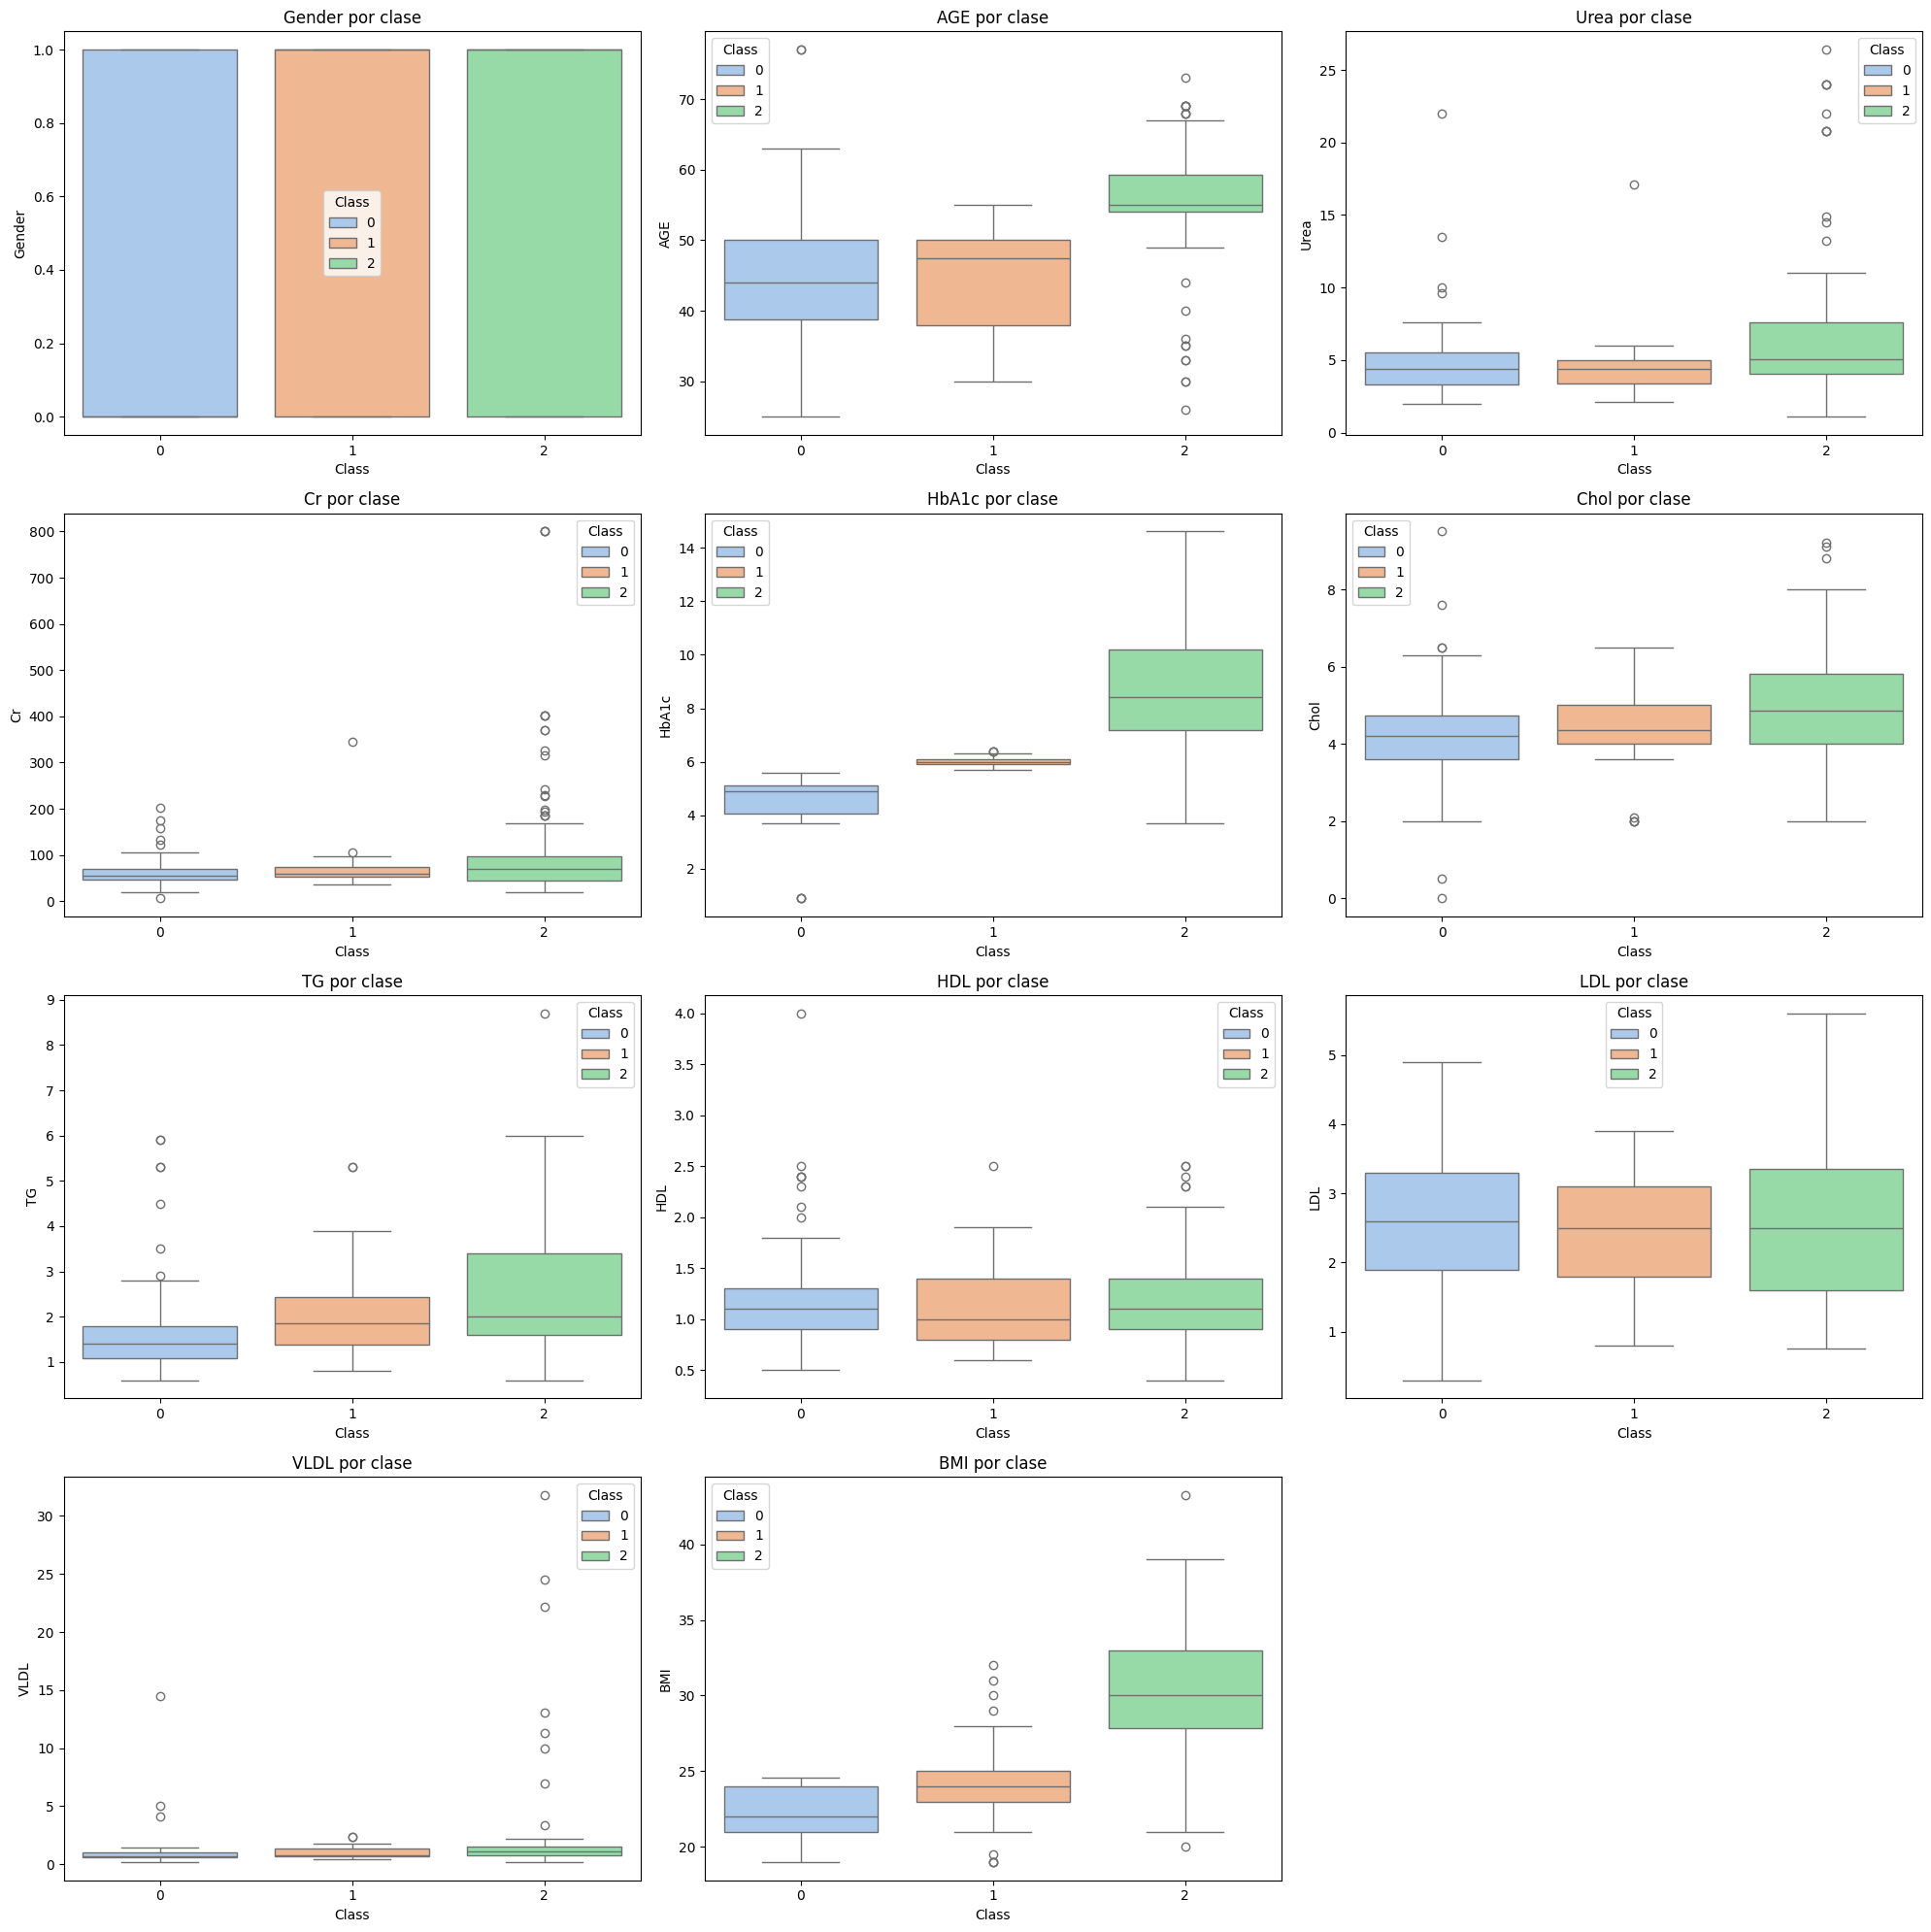

In [98]:


features = df.columns.drop(["Class"])
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x="Class", y=col, palette="pastel", hue="Class", legend='auto')
    plt.title(f"{col} por clase")
    plt.tight_layout()
plt.show()


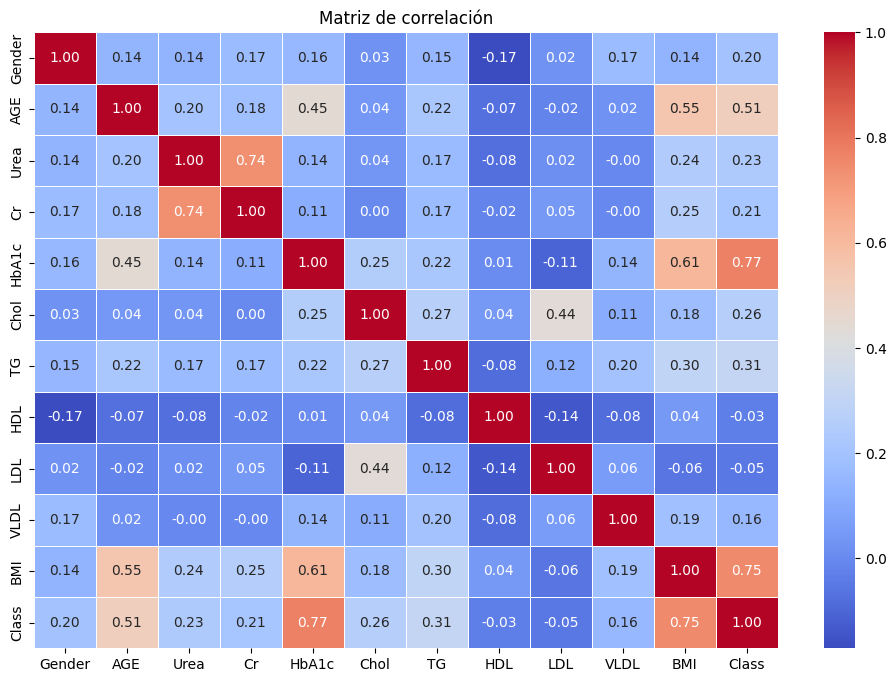

In [99]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


In [100]:
# correlaciones con variable class
correlaciones = df.corr(numeric_only=True)["Class"].sort_values(ascending=False)
print("📌 Correlación de cada variable con la variable objetivo 'Class':\n")
print(correlaciones)


📌 Correlación de cada variable con la variable objetivo 'Class':

Class     1.000000
HbA1c     0.771993
BMI       0.752083
AGE       0.514331
TG        0.313029
Chol      0.262123
Urea      0.232363
Cr        0.209028
Gender    0.196158
VLDL      0.156690
HDL      -0.029850
LDL      -0.047529
Name: Class, dtype: float64


### TRATAMIENTO DE DATOS

In [101]:
# Verificamos duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Eliminamos si hay
df = df.drop_duplicates()


Número de registros duplicados: 0


### PREPROCESAMIENTO

In [103]:
# Variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Class'])
y = df['Class']


In [104]:
preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), X.columns)
])

In [50]:
modelo_rf = RandomForestClassifier(random_state=42)


In [106]:
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", modelo_rf)
])

In [107]:
param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

In [108]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [109]:
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('scaler', ...)]"


### PREDICCION Y EVALUACION

🌟 Mejor combinación: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

📄 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.92      0.92      0.92        12
           2       0.97      0.92      0.95        39

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



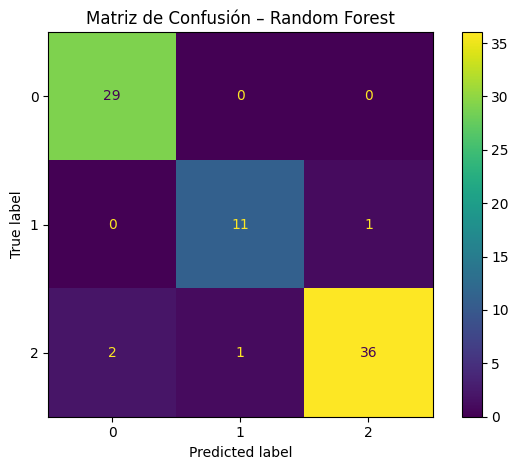

In [114]:

# 🔮 Predicción
y_pred_rf = grid_rf.predict(X_test)


# 🌟 Mejores hiperparámetros encontrados
print("🌟 Mejor combinación:", grid_rf.best_params_)

# 📋 Reporte de clasificación
print("\n📄 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred_rf))

# 📊 Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test)
plt.title("Matriz de Confusión – Random Forest")
plt.tight_layout()
plt.show()


In [115]:
simple_rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de Random Forest: {simple_rf_accuracy:.4f}")

Precisión de Random Forest: 0.9500


🔥 Top 10 características más importantes:
   Feature  Importance
4    HbA1c    0.417144
10     BMI    0.269629
1      AGE    0.113702
3       Cr    0.036481
9     VLDL    0.033167
5     Chol    0.029919
6       TG    0.029746
2     Urea    0.027904
8      LDL    0.021823
7      HDL    0.015184


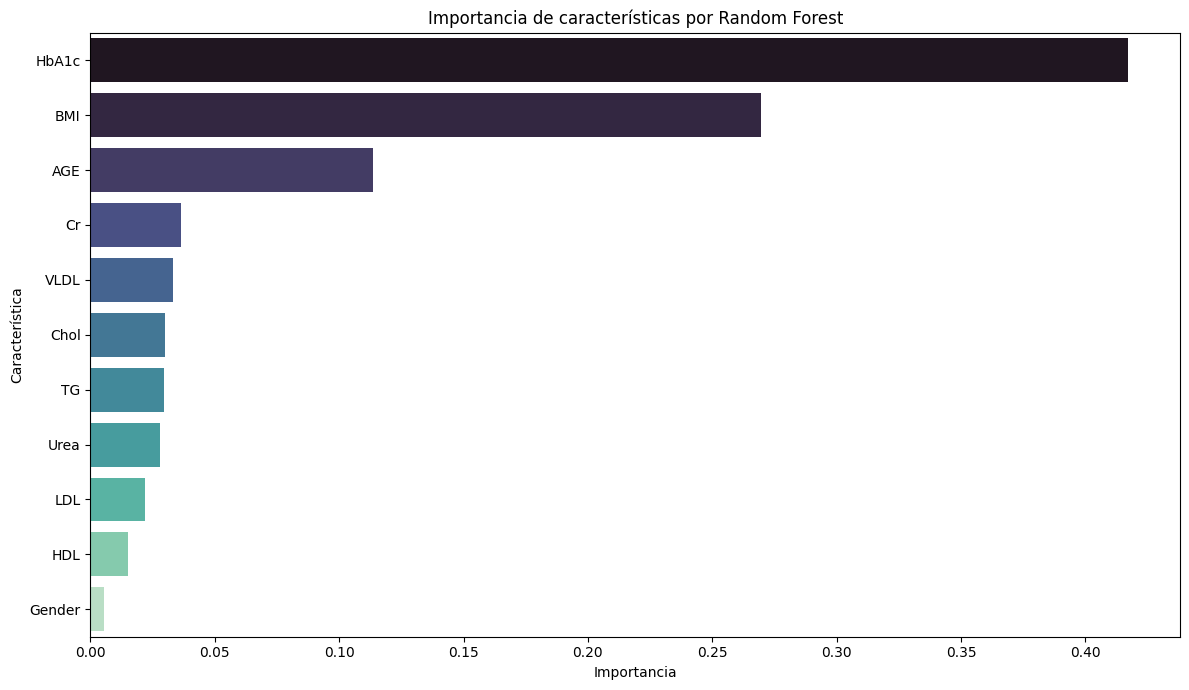

In [132]:
best_rf_model = grid_rf.best_estimator_.named_steps['classifier']
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("🔥 Top 10 características más importantes:")
print(features_df.head(10))



plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15), palette='mako', hue='Feature', legend='auto')
plt.title('Importancia de características por Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

## AJUSTE DEL MODELO CON THRESHOLD

In [157]:
# 🔮 Obtener las probabilidades de clase del mejor modelo
X_test_transformed = grid_rf.best_estimator_.named_steps['preprocessing'].transform(X_test)
y_proba = best_rf_model.predict_proba(X_test_transformed)

# 🛠 Ajuste de umbral para aumentar recall en clases 1 y 2 (diabetes)
threshold = 0.20

y_pred_custom = []

for probs in y_proba:
    if probs[1] >= threshold or probs[2] >= threshold:
        y_pred_custom.append(1 if probs[1] > probs[2] else 2)
    else:
        y_pred_custom.append(0) 
y_pred_custom = np.array(y_pred_custom)


📄 Reporte de Clasificación (umbral ajustado):

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.79      0.92      0.85        12
           2       0.97      0.95      0.96        39

    accuracy                           0.95        80
   macro avg       0.92      0.94      0.93        80
weighted avg       0.96      0.95      0.95        80



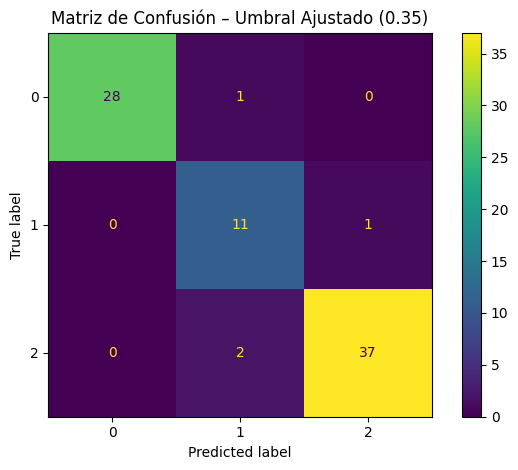

In [158]:
# 📋 Reporte de clasificación con umbral personalizado
print("📄 Reporte de Clasificación (umbral ajustado):\n")
print(classification_report(y_test, y_pred_custom))

# 📊 Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom)
plt.title("Matriz de Confusión – Umbral Ajustado (0.35)")
plt.tight_layout()
plt.show()
